# Econometría básica con Python
## Regresión Lineal Múltiple

**Fabián Alejandro Triana Alarcón**

fatrianaa1@gmail.com / fatrianaa@unal.edu.co

Economista. Estudiante de Especialización en Estadística

Universidad Nacional de Colombia

## Regresión lineal múltiple

El análisis de regresión estudia la relación que existe entre una variable dependiente ($y$) y una o más variables explicativas ($x_1,x_2,...,x_k$). Cuando el comportamiento de la variable $y$ es explicado por más de una variable, se tiene una regresión múltiple, lo cual puede expresarse de la siguiente manera:

$$y_i = \beta_0+\beta_1x_{1i}+\beta_2x_{2i}+...+\beta_kx_{ki}+u_i$$

Así, en una regresión lineal múltiple, se tienen $k$ variables que explican el comportamiento de la variable dependiente. En estas situaciones, tiende a utilizarse notación matricial en cuanto simplifica las expresiones:

$$\boldsymbol{y}=\boldsymbol{X\beta+u}$$

Debe observarse que, mientras en la expresión individual, $y_i = \beta_0+\beta_1x_{1i}+\beta_2x_{2i}+...+\beta_kx_{ki}+u_i$, no importa el orden de los términos $\beta_j$ y $x_j$ (es decir, da lo mismo escribir $\beta_jx_j$ que $x_j\beta_j$), en la expresión matricial **sí** es indispensable conservar el orden $\boldsymbol{X\beta}$. Esto se debe a que en la expresión individual se estan múltiplicando escalares y en la multiplicación de escalares el "orden de los factores no altera el resultado"; por el contrario, en la expresión matricial se están multiplicando matrices y en la multiplicación de matrices importa la dimensión, por lo que, consecuentemente, importa el orden en el que estas se multiplican.

Al emplear la notación $\boldsymbol{y=X\beta+u}$ en el problema de regresión, se tiene una matriz $\boldsymbol{y}$ de tamaño $n\times 1$ que contiene los valores de la variable dependiente, una matriz $\boldsymbol{X}$ de tamaño $n\times k$ que contiene los valores de las variables explicativas, una matriz $\boldsymbol{\beta}$ de tamaño $k\times 1$ que corresponde a los parámetros y una matriz $\boldsymbol{u}$ de tamaño $n\times 1$ que corresponde al término de error. ($n$ es el número de observaciones y $k$ el número de parámetros a estimar, incluyendo el término del intercepto si la regresión lo tiene)

El objetivo del método de Mínimos Cuadrados Ordinarios es minimizar la suma de residuos cuadrados, es decir, minimizar la suma de los valores contenidos en $\boldsymbol{\hat u}$ elevados al cuadrado. Cuando se emplea la notación matricial, del proceso de minimización se obtiene que el valor óptimo de los parámetros está dado por:

$$\boldsymbol{\hat\beta=(X^TX)^{-1}X^Ty}$$

De esta manera, reemplazando los valores muestrales en la anterior expresión se obtienen los valores estimados de los parámetros con los que se minimiza la suma de residuos cuadrados para el caso examinado.

## Regresión lineal múltiple en Python

Para llevar a cabo una estimación por MCO en un problema de regresión múltiple en Python es suficiente con importar *pandas* y *Statsmodels.api* para contar con las herramientas requeridas. Sin embargo, además de estas, también se importará *NumPy*, el módulo `pyplot` de *Matplotlib* y *Seaborn* para poder llevar a cabo un análisis más completo:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Aunque *Statsmodels.api* cuenta con una herramienta completamente funcional para la estimación por MCO (la función `OLS(...)`), inicialmente se diseñará una función propia para entender a mayor detalle la lógica del método de MCO.

Para definir la función se partirá de la lógica dada por la notación matricial, de modo que los argumentos que se incluirán al momento de emplear la función serán matrices (concretamente, `DataFrame`s de *pandas*) y las operaciones que se desarrollarán internamente corresponderán a las descritas en la expresión $\boldsymbol{\hat\beta=(X^TX)^{-1}X^Ty}$.

Aunque la forma más "natural" de emplear matrices en Python es con `array`s de *NumPy*, en esta función se emplearán `DataFrame`s de *pandas*, pues se trata de estructuras que, por sus características, resultan más completas para los objetivos planteados.

El código correspondiente a una función que lleva a cabo estimación por MCO empleando `DataFrame`s de *pandas* es el siguiente:


In [2]:
def EstimadoresMCO(X,y):
    XTX = (X.T).dot(X)
    Inversa_de_XTX = np.linalg.inv(XTX)
    XTy = (X.T).dot(y)
    Estimadores = Inversa_de_XTX.dot(XTy)
    Estimadores = pd.DataFrame(Estimadores, 
                               columns = ["Estimadores"]).set_index(X.columns)
    return Estimadores

La función que se ha definido tiene el nombre `EstimadoresMCO(...)` y recibe dos argumentos, que se espera sean `DataFrame`s de *pandas*. Internamente, la primera tarea que hace la función es transponer la matriz $\boldsymbol{X}$ y multiplicarla por la matriz $\boldsymbol{X}$. La segunda tarea que lleva a cabo es invertir la matriz resultante en el paso previo, empleando la función `inv(...)` del módulo `linalg` de *NumPy*. Después, se obtiene el producto resultante de la multiplicación de la matriz $\boldsymbol{X}$ transpuesta con la matriz $\boldsymbol{y}$. Una vez se han obtenido las matrices previamente señaladas, se procede a la obtención de los estimadores empleando la expresión $\boldsymbol{\hat\beta=(X^TX)^{-1}X^Ty}$; estos estimadores se almacenan en una variable llamada `Estimadores`, a partir de la cual se define un `DataFrame` de *pandas* que permita identificar qué valor corresponde a qué variable.

Una vez se ha ejecutado la celda de código previa, se puede emplear la función para realizar estimación de parámetros por MCO. Para esto, a modo ilustrativo, se definirán 2 variables explicativas, un vector de unos (correspondiente al intercepto) y un vector de errores con media cero y varianza constante:

In [3]:
Intercepto = np.repeat(1, 1000)
Variable1 = np.random.normal(200, 30, 1000)
Variable2 = np.random.normal(400, 80, 1000)
Error = np.random.normal(0, 4, 1000)

Ahora, se definirá el proceso que genera los valores de la variable dependiente, es decir, se asignarán valores poblacionales a los $\beta_j$ de la expresión $\boldsymbol{y=X\beta+u}$:

In [4]:
y = 2*Intercepto + 4*Variable1 + 3*Variable2 + Error

Ya se tienen definidos todos los valores necesarios, estando almacenados en `array`s de *NumPy*. Dado que la función `EstimadoresMCO(...)` espera `DataFrame`s de *pandas* como argumentos, se definirán los objetos requeridos a partir de los datos creados.   

In [5]:
Regresores = {"Intercepto": Intercepto, "Variable 1": Variable1, "Variable 2": Variable2}
X = pd.DataFrame(Regresores)

Dependiente = {"Variable Dependiente": y}
y = pd.DataFrame(Dependiente)

De este modo, se tiene una matriz $\boldsymbol{y}$ de tamaño $n\times 1$ y una matriz $\boldsymbol{X}$ de tamaño $n\times k$ a partir de las cuales se llevarán a cabo las tareas necesarias para encontrar $\boldsymbol{\hat{\beta}}$.

En un análisis de regresión se busca encontrar los valores de $\boldsymbol{\hat{\beta}}$ que mejor se adaptan, por medio de una relación lineal, al comportamiento de $\boldsymbol{y}$ de acuerdo a los valores de $\boldsymbol{X}$. En este caso, que no es más que una situación ilustrativa con datos ficticios, se sabe que $\beta_0=2, \beta_1=4, \beta_2=3$, pues estos han sido los valores que se han asignado intencionalmente para definir $y$. En un análisis de regresión con datos reales, se desconoce los valores de $\boldsymbol{\beta}$, por lo que se emplea la estimación para aproximarse de la mejor manera a estos, determinando los $\boldsymbol{\hat{{\beta}}}$ más adecuados. Así, para este caso, se espera que $\beta_0\approx 2, \beta_1\approx 4, \beta_2\approx 3$, pues, a diferencia de una situación real, se conoce de forma previa los valores específicos involucrados, por lo que se tiene una idea concreta de los coeficientes que se espera obtener.

Para conocer los valores estimados por el método de MCO se hace uso de la función definida con anterioridad empleando los `DataFrame`s creados:

In [6]:
EstimadoresMCO(X,y)

,Estimadores
Intercepto,1.089836
Variable 1,4.000014
Variable 2,3.001991


Se observa que los valores obtenidos son muy cercanos a los verdaderos valores involucrados en el proceso, por lo que la estimación por MCO parece generar muy buenos resultados; de hecho, los estimadores MCO son estimadores MELI (Mejores Estimadores Lineales Insesgados) cuando se cumple un conjunto de supuestos (Teorema de Gauss-Markov).

Ya se ha llevado a cabo una regresión lineal múltiple con una función definida de manera independiente; ahora, se hará uso de herramientas especializadas en estos procesos, las cuales generan información adicional de relevancia y permiten ajustar la estimación a las necesidades de cada caso. 

Para llevar a cabo la regresión lineal múltiple, se usará el dataset que corresponde al Ejemplo 7.1, *Mortalidad infantil en relación con el PIB per cápita y la tasa de alfabetización de las mujeres*, de Gujarati y Porter (2010).

In [7]:
data = pd.read_csv("GujaratiPorter71.txt", 
                   sep = " ", delimiter="\t")
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


El `DataFrame` contiene información de las siguientes variables:

* **CM**. Esta variable hace referencia a *Child Mortality* y corresponde a la mortalidad infantil. Se trata del número de fallecimientos, en un año, de niños con una edad inferior a 5 años por cada 1000 nacidos vivos.

* **FLR**. Esta variable hace referencia a *Female Literacy Rate* y corresponde a la tasa de alfabetización de las mujeres.

* **PGNP** hace referencia a *Per cápita Gross National Product* y corresponde al PIB per cápita en 1980.

* **TFR** hace referencia a *Total Fertility Rate* y corresponde a la tasa de fecundidad total.

En la regresión lineal múltiple que se adelantará, la variable dependiente será "CM" (mortalidad infantil) y
las variables explicativas serán "PGNP" (PIB per cápita) y "FLR" (tasa de alfabetización de las mujeres).

En primer lugar, se examinará visualmente la relación existente entre las variables explicativas a emplear y la variable dependiente:

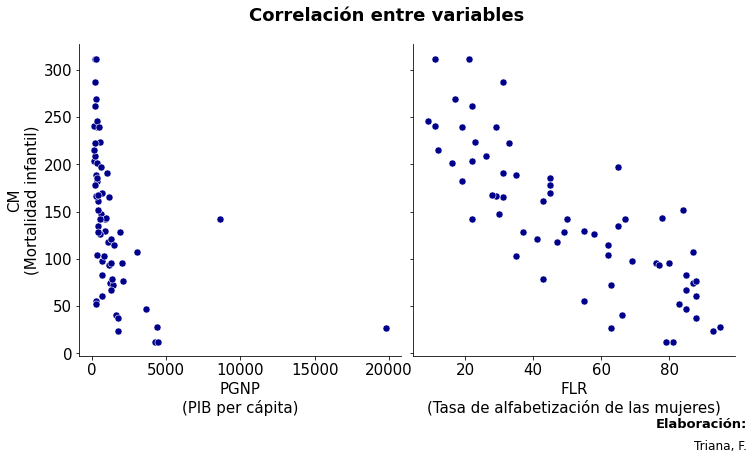

In [8]:
g = sns.pairplot(data, x_vars = ["PGNP", "FLR"],
                 y_vars = "CM", height = 5, 
                 plot_kws = {"color": "darkblue", "s": 50})
g.fig.suptitle("Correlación entre variables", fontsize = 18, 
               fontweight = "bold", y = 1.08)
g.axes.flat[0].set_xlabel("PGNP\n(PIB per cápita)", fontsize = 15)
g.axes.flat[0].set_ylabel("CM\n(Mortalidad infantil)", fontsize = 15)
g.axes.flat[1].set_xlabel("FLR\n(Tasa de alfabetización de las mujeres)", 
                          fontsize = 15)
for ax in g.axes.flat:
    ax.tick_params(labelsize = 15)
g.fig.text(1,-.09,
         "Elaboración:",
          fontsize = 13, fontweight = "bold",
          ha = "right")
g.fig.text(1,-.15,
           "Triana, F.",
           fontsize = 12, ha = "right")
plt.show()

Así, se observa que, a primera vista, la relación entre las variables explicativas y la variable dependiente es negativa en ambos casos, es decir, que entre más alto es el PIB per cápita menor es la tasa de mortalidad infantil y entre más alta es la tasa de alfabetización de las mujeres más baja es la tasa de mortalidad infantil.

De este modo, el análisis de regresión que se llevará a cabo corresponde a la expresión $CM_i = \beta_0+\beta_{PGNP}PGNP_i+\beta_{FLR}FLR_i+u_i$ y se espera que $\beta_{PGNP}$ y $\beta_{FLR}$ sean negativos.

En primer lugar, se seleccionarán las variables correspondientes y se almacenarán en objetos específicos, de modo que se simplifique la notación empleada:

In [9]:
y = data["CM"]
X = data[["PGNP", "FLR"]] 

Ahora, se emplearán los objetos como argumentos de la función $OLS(...)$ de *Statsmodels.api* para definir el modelo, se empleará el método `.fit()` para obtener los resultados de la estimación y se utilizará el método `.summary()` para obtener el resumen de la instancia de resultados:

In [10]:
# Se define el modelo:
MiModelo = sm.OLS(y, X)

# Se obtiene la estimación:
Resultados = MiModelo.fit()

# Se imprime el resumen de la instancia de resultados:
print(Resultados.summary())

                                 OLS Regression Results                                
Dep. Variable:                     CM   R-squared (uncentered):                   0.387
Model:                            OLS   Adj. R-squared (uncentered):              0.368
Method:                 Least Squares   F-statistic:                              19.61
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                    2.52e-07
Time:                        00:25:47   Log-Likelihood:                         -400.07
No. Observations:                  64   AIC:                                      804.1
Df Residuals:                      62   BIC:                                      808.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Se observa que solo uno de los coeficientes tiene el signo esperado. Sin embargo, antes de sacar conclusiones apresuradas a partir de este dudoso resultado, es necesario considerar un aspecto fundamental: la estimación no considera término del intercepto. 

La función `OLS(...)` de *Statsmodels.api* no incluye automáticamente un término de intercepto como parte de su proceso de estimación, por lo tanto, si la información usada como argumento de `X` no incluye una columna de unos, siempre se estará llevando a cabo una regresión a través del origen. De este modo, si se quiere incluir un $\beta_0$ se puede crear una columna de unos en la matriz empleada como argumento o, alternativamente y de manera más simple, emplear la función `add_constant(...)` de *Statsmodels.api* que está específicamente diseñada para tal tarea:   

In [11]:
# Se incluye una constante (término del intercepto)
# para no llevar a cabo regresión a través del origen
MiModelo2 = sm.OLS(y, sm.add_constant(X))
Resultados2 = MiModelo2.fit()
print(Resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           5.12e-17
Time:                        00:25:47   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

Se observa que esta vez ambos coeficientes son negativos, como se espera, y que el término del intercepto "const" es estadísticamente significativo (incluso al 1%), por lo que no sería adecuado efectuar la estimación excluyéndolo (además, no es recomendable ignorar el término del intercepto si no existe una razón teórica válida para justificar su eliminación, en cuanto hacerlo obliga a la línea de regresión a pasar por un punto concreto afectando su ajuste óptimo a los datos).

En el resumen de la instancia de resultados se observa no únicamente el valor de los parámetros asociados a las variables sino que también se tiene a disposición información adicional de relevancia, como los estadísticos *t*, los intervalos de confianza, el número de observaciones empleadas, el método de estimación y los resultados de algunas pruebas estadísticas básicas. Estos son solo algunos de los datos que ofrece la instancia de resultados generada; para acceder a toda la información de un objeto en Python se puede recurrir a la función nativa `dir(...)`, la cual permite conocer todos sus métodos y atributos.

In [12]:
dir(Resultados2)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


De este modo, se observa que `.summary()` es tan solo uno de los métodos y atributos de los objetos de tipo `statsmodels.regression.linear_model.RegressionResultsWrapper`, cada uno de los cuales ofrece información o funcionalidades específicas. Por ejemplo, `.rsquared` es un atributo de este tipo de objetos que corresponde al coeficiente de determinación múltiple o $R^2$: 

In [13]:
print("El R2 es: ", Resultados2.rsquared)

El R2 es:  0.7076654981900712


Este dato se puede observar en el resumen de la instancia de resultados del modelo, pero también está almacenado de forma individual como el atributo `.rsquared`. Lo mismo ocurre con los coeficientes, los cuales se presentan en el resumen de la instancia de resultados pero también están almacenados como un atributo específico: 

In [14]:
print("Los coeficientes obtenidos son:\n", Resultados2.params)

Los coeficientes obtenidos son:
 const    263.641586
PGNP      -0.005647
FLR       -2.231586
dtype: float64


Como se mencionó de forma previa, `dir(...)` es una función *built in* que permite conocer los métodos y atributos de un objeto; hasta el momento, solo se han explorado dos atributos de las instancias de resultados de un modelo estimado por MCO, sin embargo, también se puede hacer uso de métodos, es decir, funciones asociadas a un tipo de objeto en específico.

A modo de ejemplo, `.get_robustcov_results()` es un método de las instancias de resultado cuya aplicación permite efectuar una estimación robusta (empleando una matriz HC1 como valor por defecto):

In [15]:
Resultados2_robustos = Resultados2.get_robustcov_results()
print(Resultados2_robustos.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     93.06
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.94e-19
Time:                        00:25:47   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.983     22.002      0.0

De este modo, se observa que la función `OLS(...)` es una poderosa herramienta de *Statsmodels.api* que permite llevar a cabo estimación por MCO y que ofrece información muy valiosa asociada a ésta a través de los métodos y atributos de los objetos generados a partir de la misma. 

Por último, como cierre, se contrastarán los resultados obtenidos con la función especializada `OLS(...)` de *Statsmodels.api* y la función propia `EstimadoresMCO(...)`creada con anterioridad: 

In [16]:
y = data["CM"]
EstimadoresMCO(sm.add_constant(X), y)

,Estimadores
const,263.641586
PGNP,-0.005647
FLR,-2.231586


Al contrastar con los valores obtenidos de la función `OLS(...)` de *Statsmodels.api* se observa que son idénticos hasta 6 posiciones decimales: 

In [17]:
# Almacenar los resultados generados por la función propia
# en un objeto:
Estimadores_Propios = EstimadoresMCO(sm.add_constant(X), y)

# Renombrar la columna:
Estimadores_Propios.rename(columns = {"Estimadores": "Estimadores Función Propia"}, 
                           inplace = True)

# Almacenar los valores de los coeficientes
# estimados por OLS(...) de Statsmodels.api en
# un DataFrame de pandas:
Estimadores_Statsmodels = pd.DataFrame(Resultados2.params, 
                                       columns = ["Estimadores Función de Statsmodels"])

# Concatenar los dataframes para contrastar:
pd.concat([Estimadores_Propios, Estimadores_Statsmodels], axis = 1)

,Estimadores Función Propia,Estimadores Función de Statsmodels
const,263.641586,263.641586
PGNP,-0.005647,-0.005647
FLR,-2.231586,-2.231586


## Referencias:

Gujarati, D.N. y Porter, D.C. (2010). *Econometría*. México: McGraw-Hill/Interamericana Editores, S.A. de C.V.

Greene, W.H. (2003). *Econometric Analysis*. New Jersey, Estados Unidos: Pearson Education, Inc.